# Perceptron
Only for binary-class classification

Need to adjust $w$ and $b$ (in $y = w^rx + b$) to fit a line that can distinguish the dataset:
- Use the perceptron learning rules - PLR
  - $\Delta w = \eta * error * input$  
    - $error = t - y = target - value$
    - $\eta = learning rate$

- **Activation function:** the output function of the perceptron (e.g. step function)

# Cost functions

- Need to derive its first derivative
  - Want to maximize or minimize the function (e.g. minimize cost function, maximize benefit function)
- Squared such as SSE to be convex
  - Means you are 100% surtain to find a maximum or minimum point
  - If its not square, there could be multiple maximum/minimum point and we are only interested in the global maximum/minimum

In [19]:
#animate GD algorithm: code from Rasmus <openrasmus@gmail.com>
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

-90.0


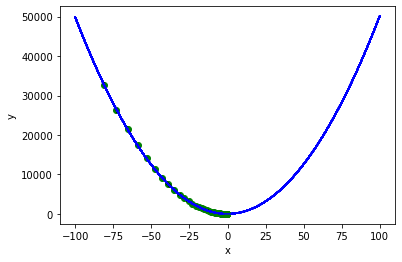

In [25]:
def f(x):
  return(5*x**2+2*x-4)
  
def dfdx(x):
  return(10*x+2)
  
iterations = 500
eta = 0.01
xx = np.arange(-100, 100, 0.1)
#x = random.randrange(-100, 100, 2)
x = -90.0
print(x)

#plt.close('all')
fig = plt.figure()
plt.xlabel('x')
plt.ylabel('y')

for i in range(iterations):
  x += -eta * dfdx(x);    #try: eta/(i+1) 
  plt.plot(x,f(x),'go')
  plt.plot(xx, f(xx), 'b-')
  if np.abs(dfdx(x)) <= 10**-1:
    break

# Training mode
- Batch gradient
- Mini Batch gradient
- Stochastic Gradient Descent (SGD)
- Large learning rate may overshoot the global minimum and fail
converge or even diverge

In [26]:
class adaline(object):
  def __init__(self, eta=0.01, n_iter=50):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    return self.net_input(X)

  def predict(self, X):
    return np.where(self.activation(X) >= 0.0, 1, -1)